In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
# Sample data for training (age, loan_amount, label: 1=paid, 0=default)
#data = {
#    'age': [25, 45, 35, 50, 23, 30, 55, 60, 40, 65],
#    'loan_amount': [5000, 12000, 10000, 15000, 4000, 8000, 20000, 25000, 9000, 30000],
#    'label': [1, 0, 1, 0, 1, 1, 0, 0, 1, 0]  # 1 = paid, 0 = default
#}

# Convert data to DataFrame
data = pd.read_csv("https://raw.githubusercontent.com/enuguru/aiandml/refs/heads/master/datasets/bankloan_classification_train.csv")

# Split features and labels
# Separate features (X) and labels (y)
X = data.iloc[:, :-1].values  # All columns except the last one are features
y = data.iloc[:, -1].values   # The last column is the target (Outcome: 0 or 1)


In [5]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (normalize the age and loan_amount)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(16, input_dim=2, activation='relu'))  # Input layer with 2 features
model.add(Dense(8, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=4, verbose=0)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Predict for 3 new samples
# New customer samples (age, loan_amount)
new_customers = np.array([[28, 6000], [50, 17000], [38, 11000]])

# Scale the new customer data
new_customers_scaled = scaler.transform(new_customers)

# Predict whether they will repay or default


predictions = model.predict(new_customers_scaled)

# Print predictions (1 = repay, 0 = default)
for i, prediction in enumerate(predictions):
    print(f"Customer {i + 1}: {'Repay' if prediction >= 0.5 else 'Default'}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.6667 - loss: 0.7307
Test Accuracy: 66.67%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Customer 1: Repay
Customer 2: Repay
Customer 3: Repay


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 581 (2.27 KB)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 388 (1.52 KB)

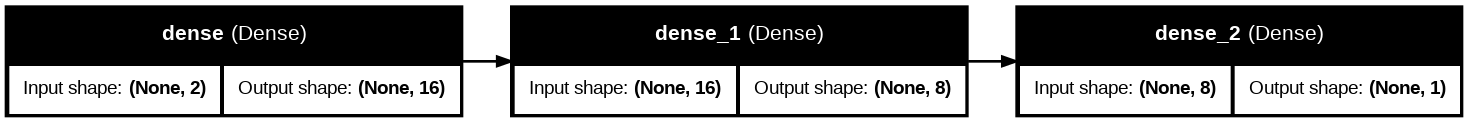

In [8]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

# Visualize the model architecture
plot_model(
    model,
    to_file='model_architecture.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='LR',
    dpi=96
)

# Display the generated image
Image('model_architecture.png')